<a href="https://colab.research.google.com/github/reyhanfarrafi/Disease-Detection-Model-Algorithm/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Upload the dataset
from google.colab import files
uploaded = files.upload()

Saving TA_Dataset1.csv to TA_Dataset1.csv


In [ ]:
# Load the dataset
df = pd.read_csv('TA_Dataset1.csv', on_bad_lines='skip')

In [ ]:
# List of categorical columns to be encoded
categorical_columns = ['Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Gender', 'Blood Pressure', 'Cholesterol Level', 'Outcome Variable']

In [ ]:
# Initialize label encoder
label_encoder = LabelEncoder()
# Apply label encoding to each of the categorical columns
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [ ]:
# Split features and target variable
X = df.drop('Outcome Variable', axis=1)
y = df['Outcome Variable']

In [ ]:
# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Reshape X for RNN [samples, time steps, features]
X = X.reshape((X.shape[0], 1, X.shape[1]))

In [ ]:
# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define the RNN model
model = Sequential()
model.add(SimpleRNN(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(SimpleRNN(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(1, activation='sigmoid'))  # For binary classification

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
# Train the model with the EarlyStopping callback
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, callbacks=[early_stopping])

Epoch 1/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4940 - loss: 0.9384 - val_accuracy: 0.7070 - val_loss: 0.8055
Epoch 2/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6359 - loss: 0.7923 - val_accuracy: 0.7602 - val_loss: 0.7353
Epoch 3/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6656 - loss: 0.7244 - val_accuracy: 0.7705 - val_loss: 0.6767
Epoch 4/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7161 - loss: 0.6725 - val_accuracy: 0.7602 - val_loss: 0.6271
Epoch 5/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6911 - loss: 0.6599 - val_accuracy: 0.7807 - val_loss: 0.5863
Epoch 6/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7284 - loss: 0.6057 - val_accuracy: 0.7766 - val_loss: 0.5507
Epoch 7/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7409 - loss: 0.5928 - val_accuracy: 0.7992 - val_loss: 0.5208
Epoch 8/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7409 - loss: 0.5858 - val_accuracy: 0.7951 - val_loss

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9373 - loss: 0.2026 
Test Accuracy: 94.06%


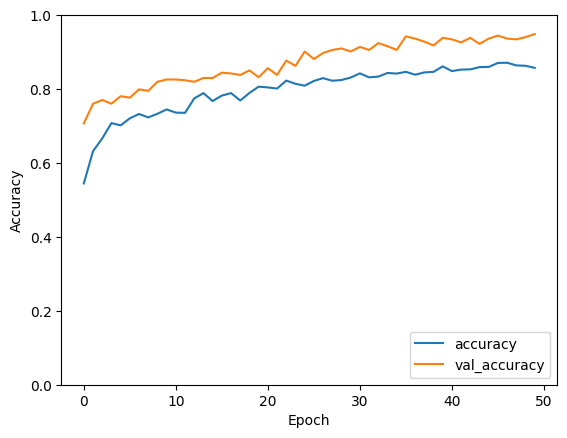

In [ ]:
# Plot accuracy over epochs
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

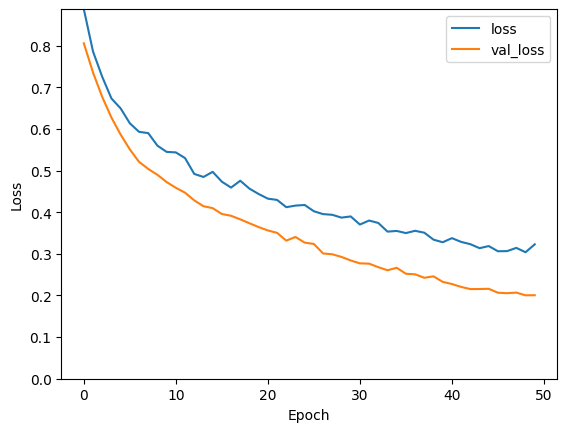

In [ ]:
# Plot loss over epochs
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, max(history.history['loss'] + history.history['val_loss'])])
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Predict on the test set
y_pred = model.predict(X_val)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary output

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


In [ ]:
# Generate the classification report
print("Classification Report:")
print(classification_report(y_val, y_pred, target_names=['Class 0', 'Class 1']))

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.93      0.94      0.94       229
     Class 1       0.95      0.94      0.94       259

    accuracy                           0.94       488
   macro avg       0.94      0.94      0.94       488
weighted avg       0.94      0.94      0.94       488



In [ ]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

In [ ]:
# Calculate sensitivity
sensitivity = tp / (tp + fn)
print(f"Sensitivity: {sensitivity:.2f}")

Sensitivity: 0.94


In [ ]:
# Calculate specificity
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.2f}")

Specificity: 0.94


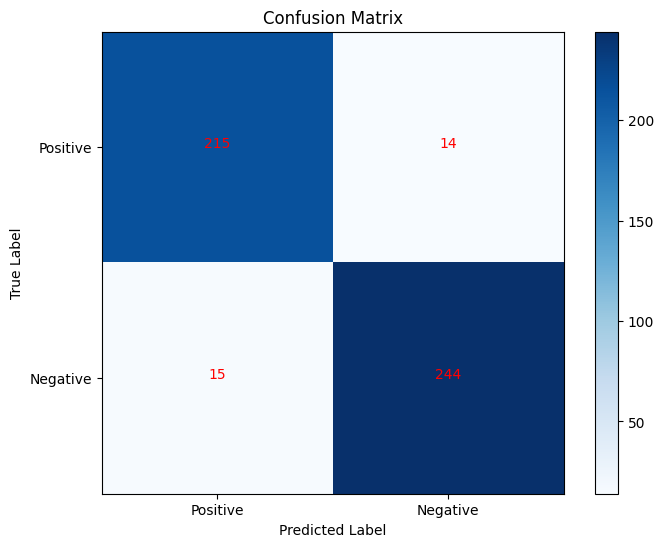

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Positive', 'Negative'])
plt.yticks(tick_marks, ['Positive', 'Negative'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
# Adding text annotations for confusion matrix
for i in range(2):
    for j in range(2):
        plt.text(j, i, conf_matrix[i, j], horizontalalignment='center', color='red')

plt.show()